___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad



--------------------------------------------------------------------------------------------------------------------------------




**This is one of my projects from the Python for Data Science course, taught by Jose Portilla on Udemy.**

https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/learn/v4/overview

My certificate:
https://www.udemy.com/certificate/UC-1EPRVFC0/

With the **TS** mark I am going to point out the exact technical skill which was new to me or I got a better understanding of it through the course

**Current Notebook**

I used basic visualization for a better understanding of the data set. 

I learned how to uses the Logistic Regression, and how different feature selection can effect the output. 

I studied the different settings of the Logistic Regression model.




## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 62.5+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

** Create a histogram of the Age**

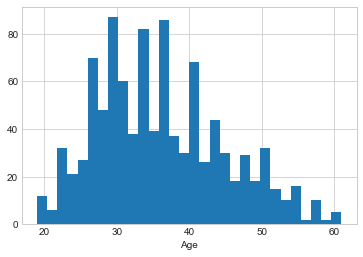

In [6]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

**Create a jointplot showing Area Income versus Age.**

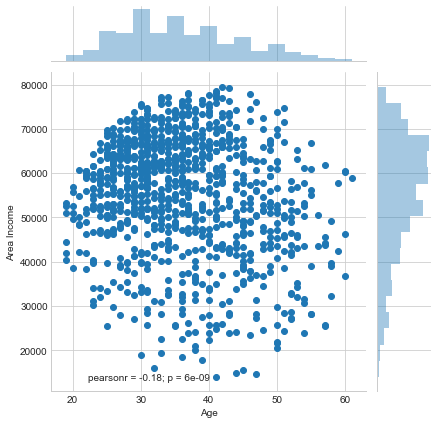

In [7]:
sns.jointplot(x='Age',y='Area Income',data=ad_data)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

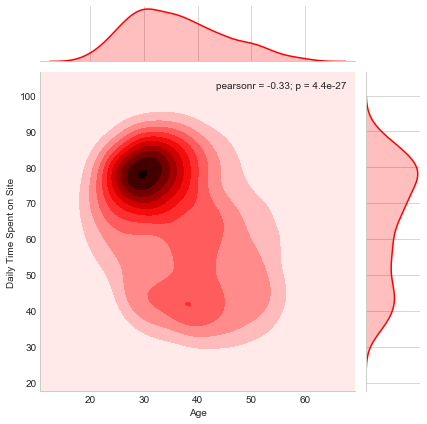

In [8]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,color='red',kind='kde');

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

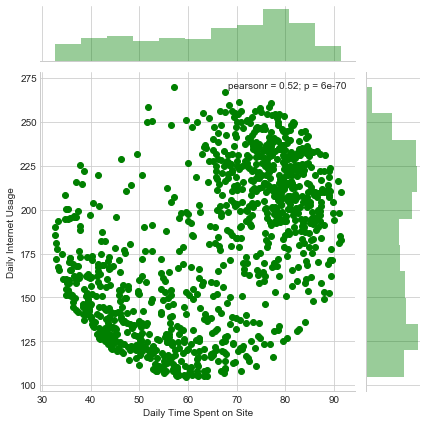

In [9]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='green')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

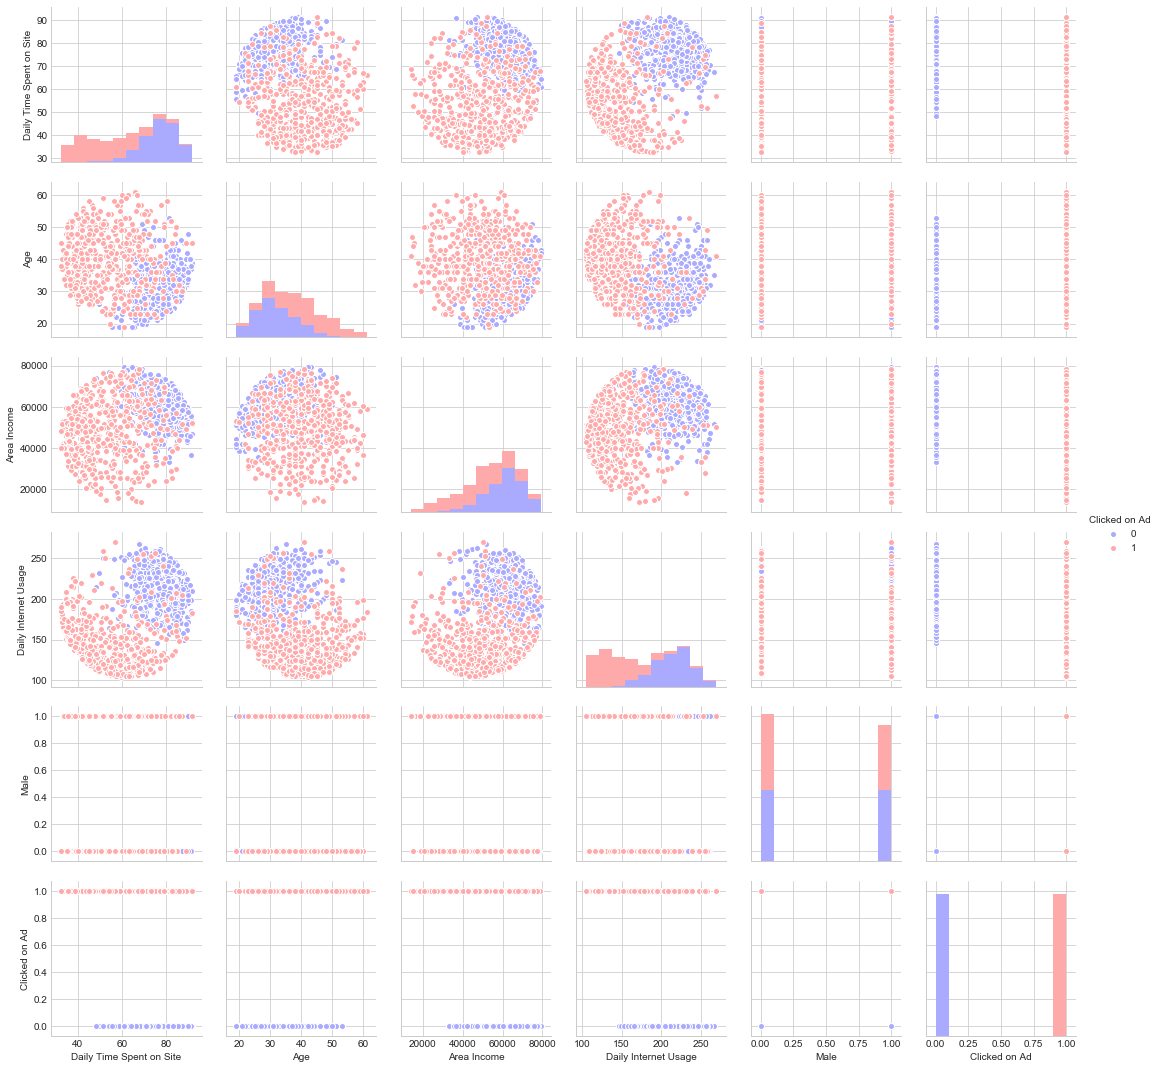

In [10]:
sns.pairplot(ad_data,hue='Clicked on Ad',palette='bwr')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

**TS**

**Parameters:**	
* **penalty:** str, ‘l1’ or ‘l2’, default: ‘l2’
Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.
New in version 0.19: l1 penalty with SAGA solver (allowing ‘multinomial’ + L1)
* **dual :** bool, default: False
Dual or primal formulation. Dual formulation is only implemented for l2 penalty with liblinear solver. Prefer dual=False when n_samples > n_features.
* **tol :** float, default: 1e-4
Tolerance for stopping criteria.
* **C :** float, default: 1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
* **fit_intercept :** bool, default: True
Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
* **intercept_scaling :** float, default 1.
Useful only when the solver ‘liblinear’ is used and self.fit_intercept is set to True. In this case, x becomes [x, self.intercept_scaling], i.e. a “synthetic” feature with constant value equal to intercept_scaling is appended to the instance vector. The intercept becomes intercept_scaling * synthetic_feature_weight.
Note! the synthetic feature weight is subject to l1/l2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) intercept_scaling has to be increased.
class_weight : dict or ‘balanced’, default: None
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).
Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.
New in version 0.17: class_weight=’balanced’
* **random_state :** int, RandomState instance or None, optional, default: None
The seed of the pseudo random number generator to use when shuffling the data. If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random. Used when solver == ‘sag’ or ‘liblinear’.
* **solver :** {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’},
default: ‘liblinear’ Algorithm to use in the optimization problem.
For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and
‘saga’ are faster for large ones.
For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’
handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty, whereas
‘liblinear’ and ‘saga’ handle L1 penalty.
Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.
New in version 0.17: Stochastic Average Gradient descent solver.
New in version 0.19: SAGA solver.
* **max_iter :** int, default: 100
Useful only for the newton-cg, sag and lbfgs solvers. Maximum number of iterations taken for the solvers to converge.
* **multi_class :** str, {‘ovr’, ‘multinomial’}, default: ‘ovr’
Multiclass option can be either ‘ovr’ or ‘multinomial’. If the option chosen is ‘ovr’, then a binary problem is fit for each label. Else the loss minimised is the multinomial loss fit across the entire probability distribution. Does not work for liblinear solver.
New in version 0.18: Stochastic Average Gradient descent solver for ‘multinomial’ case.
* **verbose :** int, default: 0
For the liblinear and lbfgs solvers set verbose to any positive number for verbosity.
* **warm_start :** bool, default: False
When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. Useless for liblinear solver.
New in version 0.17: warm_start to support lbfgs, newton-cg, sag, saga solvers.
* **n_jobs :** int, default: 1
Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the ``solver``is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not. If given a value of -1, all cores are used.

**Attributes**

* **coef_ :** array, shape (1, n_features) or (n_classes, n_features)
Coefficient of the features in the decision function.
coef_ is of shape (1, n_features) when the given problem is binary.
* **intercept_ :** array, shape (1,) or (n_classes,)
Intercept (a.k.a. bias) added to the decision function.
If fit_intercept is set to False, the intercept is set to zero. intercept_ is of shape(1,) when the problem is binary.
* **n_iter_ :** array, shape (n_classes,) or (1, )
Actual number of iterations for all classes. If binary or multinomial, it returns only 1 element. For liblinear solver, only the maximum number of iteration across all classes is given.


** Split the data into training set and testing set using train_test_split**

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']]
y = ad_data['Clicked on Ad']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

** Train and fit a logistic regression model on the training set.**

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [16]:
predictions = logmodel.predict(X_test)

** Create a classification report for the model.**

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.86      0.96      0.91       162
          1       0.96      0.85      0.90       168

avg / total       0.91      0.91      0.91       330



## Great Job!